In [78]:
import numpy as np
import matplotlib.pyplot as plt

#Eq F matrices

def bmatrix(k_array,L_array,Lw):
    k1,k2,k3,k4 = k_array
    L1,L2,L3,L4 = L_array
    B = -1*np.array([[k1*L1-k2*L2],
                  [k2*L2-k3*L4],
                  [k3*L3-k4*L4+k4*Lw]])
    return B

def kmatrix(k_array):
    k1,k2,k3,k4 = k_array
    K = np.array([[-(k1+k2),k2,0],
                 [k2,-(k2+k3),k3],
                 [0,k3,-(k3+k4)]])
    return K

In [79]:
#2. Write a function to solve for rest positions and final lengths
def position(k,L,Lw):
    if np.linalg.det(kmatrix(k)) == 0:
        raise ValueError('Singular Matrix (Unsolvable)')
    else:
        x = np.linalg.solve(kmatrix(k),bmatrix(k,L,Lw))
        return x
print(x)

def springlengths(x,Lw):
    x1,x2,x3 = x.flatten()
    L1 = x1
    L2 = x2-x1
    L3 = x3-x2
    L4 = Lw - x3
    return L1,L2,L3,L4

def checker(k,L,Lw,x):
    if max(kmatrix(k)@x - bmatrix(k,L,Lw)) == 0:
        return True
    elif max(abs(kmatrix(k)@x - bmatrix(k,L,Lw))) < 1e-6:
        return True
    else:
        return False

[[1.]
 [2.]
 [3.]]


In [80]:
k = [1,2,3,4]
L = [1,1,1,1]
Lw = 4

positions = position(k,L,Lw)
y = springlengths(positions,Lw)
print('The mass positions are:',positions.flatten(),'The spring lengths are: ',list(y))
print(checker(k,L,Lw,positions))

The mass positions are: [1. 2. 3.] The spring lengths are:  [1.0, 1.0, 1.0, 1.0]
True


In [81]:
k = [1,2,3,4]
L = [1,1,1,1]
Lw = 10

positions = position(k,L,Lw)
y = springlengths(positions,Lw)
print('The mass positions are:',positions.flatten(),'The spring lengths are: ',list(y))
print(checker(k,L,Lw,positions))

The mass positions are: [3.88 6.32 8.28] The spring lengths are:  [3.8799999999999994, 2.44, 1.96, 1.7200000000000006]
True


In [82]:
k = [1,1,1,1]
L = [2,2,1,1]
Lw = 4

positions = position(k,L,Lw)
y = springlengths(positions,Lw)
print('The mass positions are:',positions.flatten(),'The spring lengths are: ',list(y))
print(checker(k,L,Lw,positions))

The mass positions are: [1.5 3.  3.5] The spring lengths are:  [1.5, 1.5, 0.5, 0.5]
True


In [83]:
k = [1,1,1,0]
L = [2,2,1,1]
Lw = 4

positions = position(k,L,Lw)
y = springlengths(positions,Lw)
print('The mass positions are:',positions.flatten(),'The spring lengths are: ',list(y))
print(checker(k,L,Lw,positions))

The mass positions are: [2. 4. 5.] The spring lengths are:  [1.9999999999999998, 1.9999999999999998, 0.9999999999999996, -0.9999999999999991]
True


In [84]:
k = [0,1,1,0]
L = [2,2,1,1]
Lw = 4

positions = position(k,L,Lw)
y = springlengths(positions,Lw)
print('The mass positions are:',positions.flatten(),'The spring lengths are: ',list(y))
print(checker(k,L,Lw,positions))

ValueError: Singular Matrix (Unsolvable)

In [96]:
#4 Challenge Question
k = [1,1,1,1]
L = [2,2,1,1]
Lw = 4
N = 50
fwall = np.zeros(N)
Lw = np.linspace(1,10,N).reshape(N)
for i in range(N):
    fwall[i] = -k[3]*(Lw[i] - position(k,L,Lw[i])[2] - L[3])
print(fwall)

[ 1.25        1.20408163  1.15816327  1.1122449   1.06632653  1.02040816
  0.9744898   0.92857143  0.88265306  0.83673469  0.79081633  0.74489796
  0.69897959  0.65306122  0.60714286  0.56122449  0.51530612  0.46938776
  0.42346939  0.37755102  0.33163265  0.28571429  0.23979592  0.19387755
  0.14795918  0.10204082  0.05612245  0.01020408 -0.03571429 -0.08163265
 -0.12755102 -0.17346939 -0.21938776 -0.26530612 -0.31122449 -0.35714286
 -0.40306122 -0.44897959 -0.49489796 -0.54081633 -0.58673469 -0.63265306
 -0.67857143 -0.7244898  -0.77040816 -0.81632653 -0.8622449  -0.90816327
 -0.95408163 -1.        ]


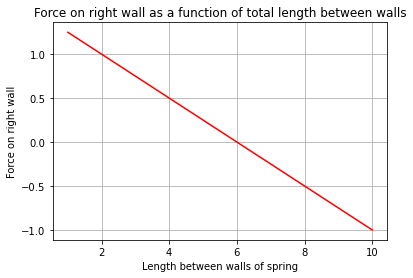

In [97]:
plt.xlabel('Length between walls of spring')
plt.ylabel('Force on right wall')
plt.grid(True)
plt.title('Force on right wall as a function of total length between walls')
plt.plot(Lw,fwall,'r')
plt.show()

In [99]:
#Verify numerically force on right wall 
k0 = 1/(1/k[0] + 1/k[1] + 1/k[2] + 1/k[3])
L0 = L[0] + L[1] + L[2] + L[3]
fwall = -k0*(Lw-L0)
fwall

array([ 1.25      ,  1.20408163,  1.15816327,  1.1122449 ,  1.06632653,
        1.02040816,  0.9744898 ,  0.92857143,  0.88265306,  0.83673469,
        0.79081633,  0.74489796,  0.69897959,  0.65306122,  0.60714286,
        0.56122449,  0.51530612,  0.46938776,  0.42346939,  0.37755102,
        0.33163265,  0.28571429,  0.23979592,  0.19387755,  0.14795918,
        0.10204082,  0.05612245,  0.01020408, -0.03571429, -0.08163265,
       -0.12755102, -0.17346939, -0.21938776, -0.26530612, -0.31122449,
       -0.35714286, -0.40306122, -0.44897959, -0.49489796, -0.54081633,
       -0.58673469, -0.63265306, -0.67857143, -0.7244898 , -0.77040816,
       -0.81632653, -0.8622449 , -0.90816327, -0.95408163, -1.        ])